In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [6]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [7]:
df.shape

(426880, 26)

In [8]:
df = df[df['lat'].notna()]
df.shape

(420331, 26)

In [9]:
df['long'].isnull().sum()

0

In [77]:
df = df.drop(['county', 'size'], axis=1)

KeyError: "['county'] not found in axis"

In [14]:
df.shape

(420331, 25)

In [15]:
df.describe()

,id,price,year,odometer,lat,long
count,4.203310e+05,4.203310e+05,419194.000000,4.159990e+05,420331.000000,420331.000000
mean,7.311504e+09,7.619367e+04,2011.194771,9.834438e+04,38.493940,-94.748599
std,4.384679e+06,1.227682e+07,9.497954,2.148407e+05,5.841533,18.365462
min,7.301583e+09,0.000000e+00,1900.000000,0.000000e+00,-84.122245,-159.827728
25%,7.308142e+09,5.990000e+03,2008.000000,3.768500e+04,34.601900,-111.939847
50%,7.312675e+09,1.398800e+04,2013.000000,8.581600e+04,39.150100,-88.432600
75%,7.315258e+09,2.659000e+04,2017.000000,1.340000e+05,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,82.390818,173.885502


In [18]:
df.posting_date.min()

'2021-04-04T00:10:40-0700'

In [19]:
df.posting_date.max()

'2021-05-04T23:59:45-0400'

In [23]:
df.lat.value_counts()

lat
33.779214    3301
43.182400    2666
40.468785    2346
33.786500    2341
46.234838    1866
             ... 
29.016844       1
35.143705       1
35.249000       1
35.123981       1
43.642930       1
Name: count, Length: 53181, dtype: int64

In [24]:
df.long.value_counts()

long
-84.411811     3301
-84.112200     2666
-74.281707     2346
-84.445400     2341
-119.128015    1866
               ... 
-85.686734        1
-85.656238        1
-85.570107        1
-85.696535        1
-108.222976       1
Name: count, Length: 53772, dtype: int64

In [26]:
df = df[df['year'].notna()]
df.shape

(419194, 25)

In [27]:
print(f"Maximum price: {df.price.max()} $\nMinimum price: {df.price.min()} $")

Maximum price: 3736928711 $
Minimum price: 0 $


In [28]:
df.drop(df[df.price > 150000].index, inplace = True)

(array([93745., 88839., 59792., 47386., 32592., 10797.,  5464.,  2695.,
         1688.,   926.]),
 array([    0.,  8000., 16000., 24000., 32000., 40000., 48000., 56000.,
        64000., 72000., 80000.]),
 <BarContainer object of 10 artists>)

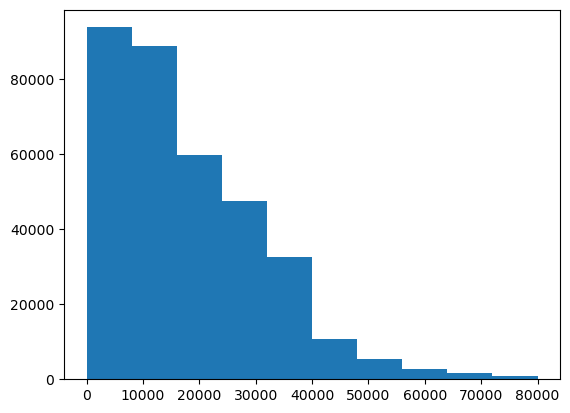

In [96]:
plt.hist(df.price, range = [0,80000])

In [44]:
print('# of cars priced below $1000: ' + str(len(df[df['price'] < 1000]))) #43188
df.drop(df[df.price < 1000].index, inplace = True)

43188


In [58]:
print('# of cars priced below $1000: ' + str(len(df[df['price'] < 1000])))

# of cars priced below $1000: 0


(array([99768., 92181., 63990., 52440., 39088., 13158.,  6897.,  3414.,
         2257.,  1250.]),
 array([    0.,  8000., 16000., 24000., 32000., 40000., 48000., 56000.,
        64000., 72000., 80000.]),
 <BarContainer object of 10 artists>)

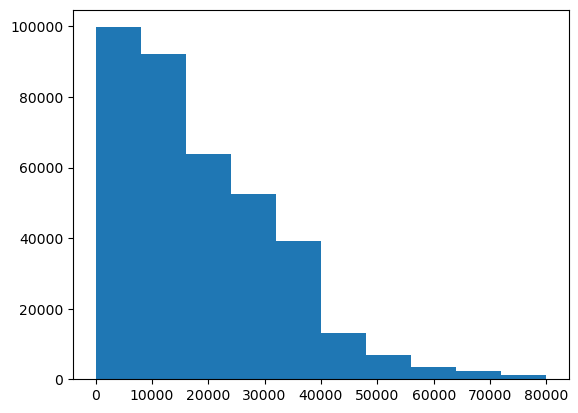

In [45]:
plt.hist(df.price, range = [0,80000])

In [46]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     13878
model             4371
condition       139675
cylinders       154735
fuel              2303
odometer          2016
title_status      6257
transmission      1752
VIN             143907
drive           114404
size            270613
type             80771
paint_color     108400
image_url            0
description          2
state                0
lat                  0
long                 0
posting_date         0
dtype: int64

In [49]:
df.condition.value_counts()

condition
good         117923
excellent     91355
like new      19353
fair           6088
new             982
salvage         434
Name: count, dtype: int64

In [54]:
df.drop(df[df.condition == 'salvage'].index, inplace=True)
#df.drop(df[df.price > 150000].index, inplace = True)

In [56]:
df.condition.value_counts()
df.shape

(375376, 25)

In [64]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     13847
model             4359
condition       139675
cylinders       154663
fuel              2303
odometer          2016
title_status      6257
transmission      1752
VIN             143528
drive           114285
size            270430
type             80669
paint_color     108309
image_url            0
description          2
state                0
lat                  0
long                 0
posting_date         0
dtype: int64

In [73]:
#plt.hist(df.odometer, range=[0,10000])
#df.odometer.max()
df['odometer'].describe()

count    3.733600e+05
mean     9.837583e+04
std      1.849341e+05
min      0.000000e+00
25%      3.845400e+04
50%      8.800000e+04
75%      1.363018e+05
max      1.000000e+07
Name: odometer, dtype: float64

In [74]:
df.drop(df[df.odometer < 10000].index, inplace = True)

In [75]:
df.drop(df[df.odometer > 300000].index, inplace = True)

(array([69668., 53496., 56857., 57254., 46615., 31480., 17512.,  8042.,
         3531.,  1674.]),
 array([ 10000.,  39000.,  68000.,  97000., 126000., 155000., 184000.,
        213000., 242000., 271000., 300000.]),
 <BarContainer object of 10 artists>)

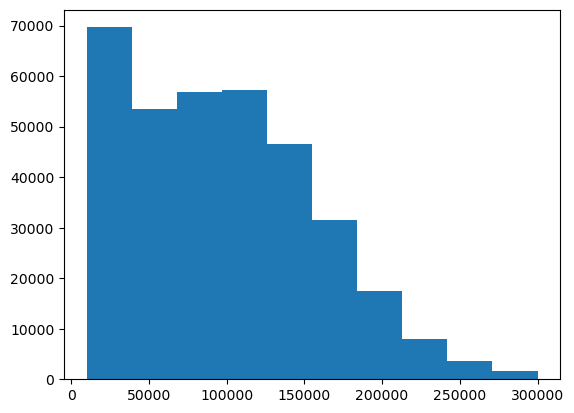

In [76]:
plt.hist(df.odometer, range=[10000,300000])

In [79]:
df = df[df['year'].notna()]
df = df[df['model'].notna()]

In [82]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer     11715
model                0
condition       129873
cylinders       137784
fuel              2184
odometer          2010
title_status      5774
transmission      1595
VIN             132166
drive           102562
size            245111
type             72968
paint_color      97894
image_url            0
description          1
state                0
lat                  0
long                 0
posting_date         0
dtype: int64

In [84]:
df['description'].astype(str).contains('Carvana')

AttributeError: 'Series' object has no attribute 'contains'

In [89]:
df['posting_date'] = pd.to_datetime(df['posting_date'])

C:\Users\mitch\AppData\Local\Temp\ipykernel_12792\2989692367.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['posting_date'] = pd.to_datetime(df['posting_date'])


(array([14929., 21414., 17604., 25686., 23819., 31588., 36317., 43103.,
        62548., 67596.]),
 array([18721.29195602, 18724.38110417, 18727.47025231, 18730.55940046,
        18733.64854861, 18736.73769676, 18739.82684491, 18742.91599306,
        18746.0051412 , 18749.09428935, 18752.1834375 ]),
 <BarContainer object of 10 artists>)

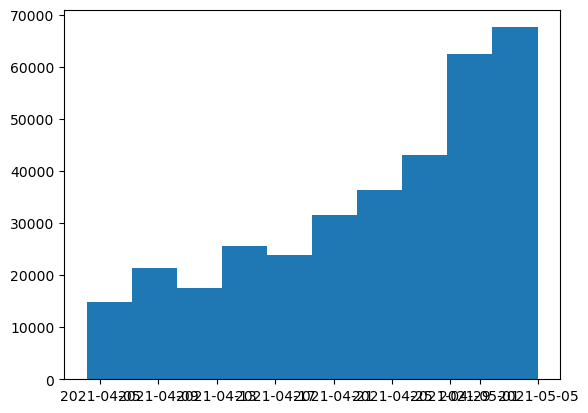

In [95]:
plt.hist(df.posting_date)